In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import prepState
from numpy import linalg as LA
from numpy import log as ln
from timeEvo import *
#from generateStates import *
from qutip import *


# for using tex formatting and font in plots
#"""
plt.rcParams.update({"text.usetex": True,}) 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage[utf8]{inputenc}\usepackage[T1]{fontenc}\usepackage{lmodern}\inputencoding{utf8}\usepackage{amsmath}\usepackage{amssymb}\usepackage{dsfont}\usepackage{mathtools}\usepackage{physics}']
mpl.rc('font', **{'family':'sans-serif', 'size':11})
cmap = mpl.cm.get_cmap('viridis')#['viridis', 'plasma', 'inferno', 'magma', 'cividis']

In [10]:
## load quanitites


corr_12_fid = np.loadtxt("txtfiles/corr_at_diff_pos/12_fidelity.txt")
corr_12_dkl = np.loadtxt("txtfiles/corr_at_diff_pos/12_dkl.txt")
corr_12_infoflow = np.loadtxt("txtfiles/corr_at_diff_pos/12_infoflow.txt")
corr_12_pendrybound = np.loadtxt("txtfiles/corr_at_diff_pos/12_pendry.txt")

corr_23_fid = np.loadtxt("txtfiles/corr_at_diff_pos/23_fidelity.txt")
corr_23_dkl = np.loadtxt("txtfiles/corr_at_diff_pos/23_dkl.txt")
corr_23_infoflow = np.loadtxt("txtfiles/corr_at_diff_pos/23_infoflow.txt")
corr_23_pendrybound = np.loadtxt("txtfiles/corr_at_diff_pos/23_pendry.txt")

corr_34_fid = np.loadtxt("txtfiles/corr_at_diff_pos/34_fidelity.txt")
corr_34_dkl = np.loadtxt("txtfiles/corr_at_diff_pos/34_dkl.txt")
corr_34_infoflow = np.loadtxt("txtfiles/corr_at_diff_pos/34_infoflow.txt")
corr_34_pendrybound = np.loadtxt("txtfiles/corr_at_diff_pos/34_pendry.txt")

corr_45_fid = np.loadtxt("txtfiles/corr_at_diff_pos/45_fidelity.txt")
corr_45_dkl = np.loadtxt("txtfiles/corr_at_diff_pos/45_kld.txt")
corr_45_infoflow = np.loadtxt("txtfiles/corr_at_diff_pos/45_infoflow.txt")
corr_45_pendrybound = np.loadtxt("txtfiles/corr_at_diff_pos/45_pendry.txt")

hom_kld = np.loadtxt("txtfiles/j_const/dkl.txt")[:1850]
hom_fid = np.loadtxt("txtfiles/j_const/fidelity.txt")[:1850]

perf_kld = np.loadtxt("txtfiles/j_var/dkl.txt")
perf_fid = np.loadtxt("txtfiles/j_var/fidelity.txt")


i_dot_sq_max_alpha = np.loadtxt("txtfiles/i_dot_sq_max/maxima.txt", usecols=0)
fid_max_alpha = np.loadtxt("txtfiles/i_dot_sq_max/maxima.txt", usecols=1)
bound_diff_max = np.loadtxt("txtfiles/i_dot_sq_max/maxima.txt", usecols=2)
alpha = np.loadtxt("txtfiles/i_dot_sq_max/maxima.txt", usecols=3)

fidelities = [hom_fid, perf_fid]#[corr_12_fid, corr_23_fid, corr_34_fid, corr_45_fid]
dkls = [hom_kld, perf_kld]#[corr_12_dkl, corr_23_dkl, corr_34_dkl, corr_45_dkl]
#
infoflows = [corr_12_infoflow, corr_23_infoflow, corr_34_infoflow, corr_45_infoflow]
bounds = [corr_12_pendrybound, corr_23_pendrybound, corr_34_pendrybound, corr_45_pendrybound]



n = 2000
dt = 1e-3
t = np.linspace(0, n*dt, n)
cm = 1/2.54

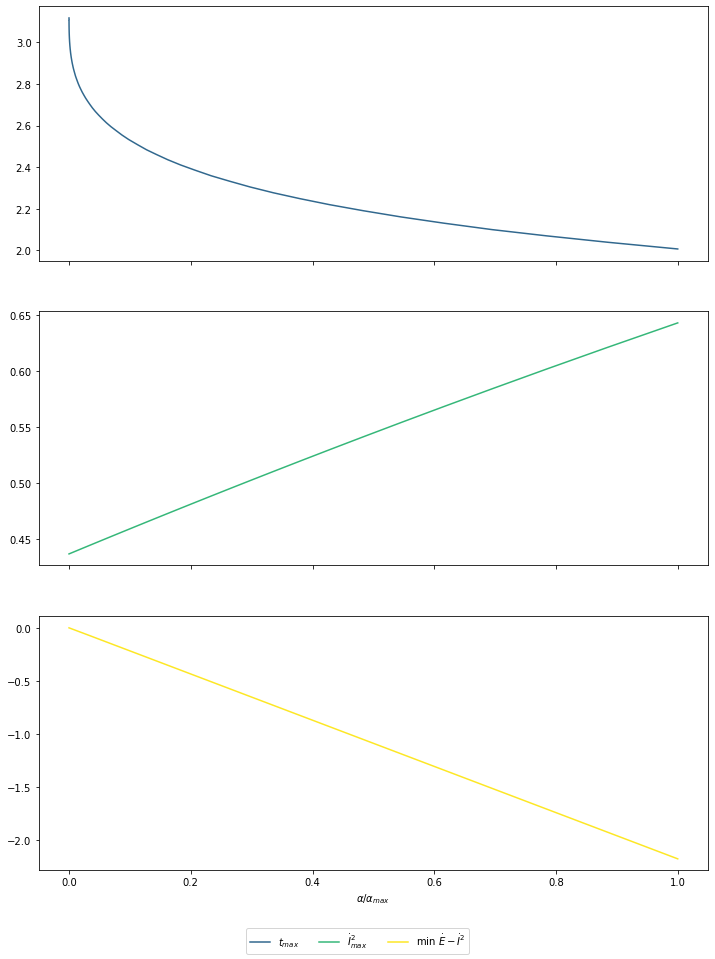

In [14]:
fig, (axs1,axs2,axs3) = plt.subplots(3,sharex=True,figsize=(12,15))

axs1.plot(alpha, fid_max_alpha*1e-3, label=r"$t_{max}$", color=cmap(1/3))
axs2.plot(alpha, i_dot_sq_max_alpha, label=r"$\dot{I}^2_{max}$", color=cmap(2/3))
axs3.plot(alpha, bound_diff_max, label=r"min $\dot{E}-\dot{I}^2$", color =cmap(999/1000))
axs3.set_xlabel(r"$\alpha/\alpha_{max}$")

fig.legend(loc=8, ncol=3)
#fig.tight_layout()
fig.subplots_adjust(bottom=.08)


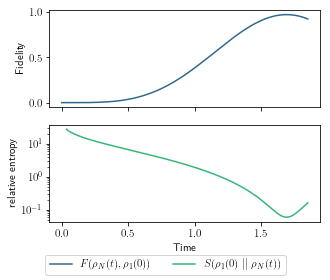

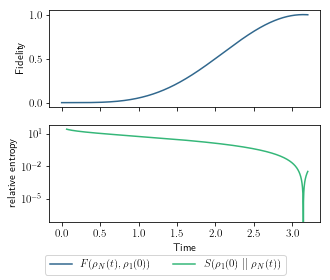

In [12]:
folder = "j_const"
t = np.linspace(0,1.85,1850)
i=0
pos=1
for corr_fid in fidelities:
    pos = pos+11
    corr_dkl = dkls[i]

    fig, (ax, ax1) = plt.subplots(2,1,sharex=True,figsize=(12*cm,10*cm))

    ax.plot(t, corr_fid, label=r"$F(\rho_N(t), \rho_1(0))$", color=cmap(1/3))
    ax1.plot(t, corr_dkl, label=r"$S(\rho_1(0)\mid\mid\rho_N(t))$", color=cmap(2/3))
    ax1.set_yscale('log')
    ax1.set_xlabel(r'Time')
    ax.set_ylabel(r'Fidelity')
    ax1.set_ylabel(r'relative entropy')
    #ax1.set_yticks([10, 1, .1])
    #ax.set_yscale('log')
    #ax.axvline(max_index*1e-3,color='grey', linewidth=1)
    #ax1.axvline(max_index*1e-3,color='grey', linewidth=1)
    #ax.axhline(0,color='grey', linewidth=1)
    fig.legend(loc=8, ncol=2)
    fig.tight_layout()
    fig.subplots_adjust(bottom=.2)
    plt.savefig("alltheplots/"+folder+"/fidelity_kld.pdf")
    t = np.linspace(0,3.2,3200)
    folder = "j_var"
    i+=1

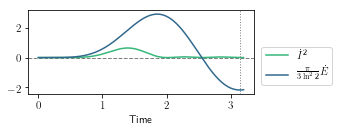

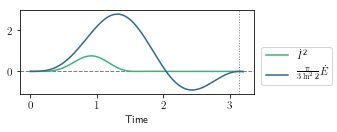

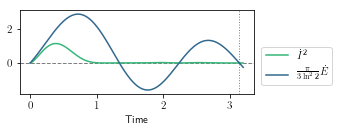

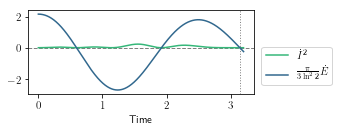

In [29]:
j = 0
pos = 1

for infoflow in infoflows:
    pos = pos+11
    pendrybound = bounds[j]
    fig, axs1= plt.subplots(figsize=(12*cm,5*cm))
    
    axs1.axhline(0, color="grey", ls='--', linewidth=1)
    
    axs1.plot(t[:-1], infoflow, label=r"$\dot{I}^2$", color=cmap(2/3))
    #axs1.axvline(max_index_long*1e-3,color='grey', ls=':',linewidth=1)
    #axs1.axvline(max_index_long_2*1e-3, color='grey', ls=':', linewidth=1)
    axs1.axvline(np.pi, color='grey', ls=':', linewidth=1)
    axs1.plot(t, pendrybound, label=r"$\frac{\pi}{3\ln^22}\dot{E}$", color=cmap(1/3))
    #axs1.plot(t, oldbound, label=r"old bound", color=cmap(1))
    #axs1.set_ylim(-1,1)
    #axs1.set_xlim(3.0, 3.2)
    axs1.set_xlabel(r'Time')
    #axs1.set_xlim()
    fig.legend(loc=7)
    fig.tight_layout()
    fig.subplots_adjust(right=.76)
    
    #plt.savefig("alltheplots/corr_at_diff_pos/"+str(pos)+"_pendry_grey_lines.pdf")
    j=j+1
    #plt.show()

In [1]:
## surface plot

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(12,5))

# Make data.
beta_one = np.linspace(0, 3, 100)
beta_two = np.linspace(0, 3, 100)
beta_one, beta_two = np.meshgrid(beta_one, beta_two)
#R = np.sqrt(X**2 + Y**2)
alpha = 1/(4*np.cosh(beta_one)*np.cosh(beta_two))

# Plot the surface.
surf = ax.plot_surface(beta_one, beta_two, alpha, cmap=cmap,
                       linewidth=0, antialiased=False)

from matplotlib.ticker import LinearLocator

# Customize the axes.
ax.set_zlim(0, .25)
ax.set_xlabel(r"$\beta_2$")
ax.set_ylabel(r"$\beta_1$")
ax.zaxis.set_major_locator(LinearLocator(2))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

ax.view_init(30,15)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5, location="right")

NameError: name 'plt' is not defined

In [ ]:
#axs1.set_xlim(0,1.8)
#axs1.set_ylim(-4,8)
#axs1.axhline(0, color="grey", linewidth=1)
#axs1.axvline(1.69, color="grey", linewidth=1)
#axs1.set_xlabel(r"Time")
#axs2.plot(t, Heatlim_perf_zero, label=r"$\frac{\pi}{3\ln(2)^2}\dot{E}$", color=cmap(1/3), linewidth=1)
#axs2.plot(t[:-1], infoFlow_perf_zero, label=r"$\dot{I}^2$", color=cmap(2/3), linewidth=2*.5)
#axs3.plot(t, diff, label=r"$\Delta \dot{E}$", color = cmap(.5))
#axs3.axhline(0, color="grey")
#axs2.axhline(0, color="grey")
#axs2.set_xlabel(r"Time")
#axs2.set_xlim(2,3.2)
#axs1.set_ylabel(r"Squared information flow and its bound")
#axs1.annotate(r"first 1", xy=(0.9,1), xytext=(0.8,0.95), arrowprops=dict(arrowstyle='->', facecolor='black'))
#axs1.text(0,0.96,r"a)")
#axs1.set_title(r"nicer plot", loc="right")